# TP2 - LINEAR REGRESSION 

In [1]:
# Change here using YOUR own first and last names
fn1 = "Laura Manuela"
ln1 = "Castaneda Medina"
filename = "_".join(map(lambda s: s.strip().lower(), ["SD-TSIA204_lab2", ln1, fn1])) + ".ipynb"

## Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
from numpy.linalg import inv
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Linear regression

1. For the first question, we load a standard dataset from ``sklearn.datasets`` named ``fetch_california_housing``. This dataset has only $p = 8$ variables.    

In [3]:
# Load standard dataset from sklearn.datasets named fetch_california_housing
california = fetch_california_housing()

# print the keys of the dataset
print(california.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


(a) Estimate the coefficients with the expression of the normal equaitons seen in class. Code two functions to compute the MSE and the R2 coefficient and compare them with the version of sklearn for the train and the test sets.

In [4]:
X = california.data
y = california.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
# add x0 = 1 to each instance
X_train = np.c_[np.ones((len(X_train), 1)), X_train]
theta_best_train = inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

In [6]:
def MSE(y, y_pred):
    return np.sum((y_pred - y)**2) / len(y)

def R2(y, y_pred):
    return 1 - (np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2))

y_pred_train = X_train.dot(theta_best_train)

print("MSE_fun Train: ", MSE(y_train, y_pred_train))
print("R2_fun Train: ", R2(y_train, y_pred_train))
print("MSE_sklearn Train: ", mean_squared_error(y_train, y_pred_train))
print("R2_sklearn Train: ", r2_score(y_train, y_pred_train))

MSE_fun Train:  0.523441360712545
R2_fun Train:  0.6088968118672868
MSE_sklearn Train:  0.523441360712545
R2_sklearn Train:  0.6088968118672868


In [7]:
X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]  # add x0 = 1 to each instance
theta_best_test = inv(X_test.T.dot(X_test)).dot(X_test.T).dot(y_test)

In [8]:
def MSE(y, y_pred):
    return np.sum((y_pred - y)**2) / len(y)

def R2(y, y_pred):
    return 1 - (np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2))

y_pred_test = X_test.dot(theta_best_test)

print("MSE_fun Test: ", MSE(y_test, y_pred_test))
print("R2_fun Test: ", R2(y_test, y_pred_test))
print("MSE_sklearn Test: ", mean_squared_error(y_test, y_pred_test))
print("R2_sklearn Test: ", r2_score(y_test, y_pred_test))

MSE_fun Test:  0.5245192803244776
R2_fun Test:  0.5977473765439644
MSE_sklearn Test:  0.5245192803244776
R2_sklearn Test:  0.5977473765439644


(b) Finally, give the confidence intervals at level 99% for all the coefficients coding the expression
for the CI seen in session 3

In [9]:
theta = inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train) # theta using the Normal Equation.
y_pred = X_train.dot(theta) # predicted values.
residuals = y_train - y_pred # residuals.

n, m = X.shape
sigma_squared = (residuals.T.dot(residuals)) / (n - 2)
var_theta = sigma_squared * inv(X_train.T.dot(X_train)) # variance of residuals.

stderrs = np.sqrt(np.diag(var_theta)) # standard errors for each coefficient.

alpha = 0.01 
t_crit = stats.t.ppf(1 - alpha / 2, df=n - 2) # critical t-value.

# Confidence intervals.
conf_intervals = [(theta[i] - t_crit * stderrs[i], theta[i] + t_crit * stderrs[i]) for i in range(m)]

# Print confidence intervals.
for i, conf_int in enumerate(conf_intervals):
    print(f"Coefficient {i}: {conf_int}")


Coefficient 0: (-38.55692869207945, -35.16020954083233)
Coefficient 1: (0.42255935789069654, 0.4441074554409299)
Coefficient 2: (0.008145433695566136, 0.010441053049014725)
Coefficient 3: (-0.11377915427921363, -0.08350759343611937)
Coefficient 4: (0.5215491417899515, 0.664881832094046)
Coefficient 5: (-1.968589486541415e-05, 4.562044815746418e-06)
Coefficient 6: (-0.006767742006543524, -0.002722585656230336)
Coefficient 7: (-0.43999829859671014, -0.40290037351207486)


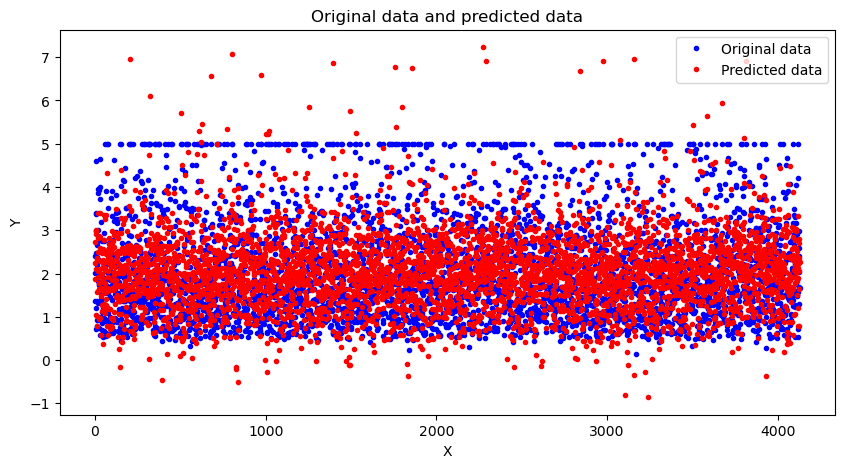

In [10]:
# Plot the original data and the predicted data in the same figure

plt.figure(figsize=(10, 5))
plt.plot(y_test, 'b.', label='Original data')
plt.plot(y_pred_test, 'r.', label='Predicted data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Original data and predicted data')
plt.legend()
plt.show()

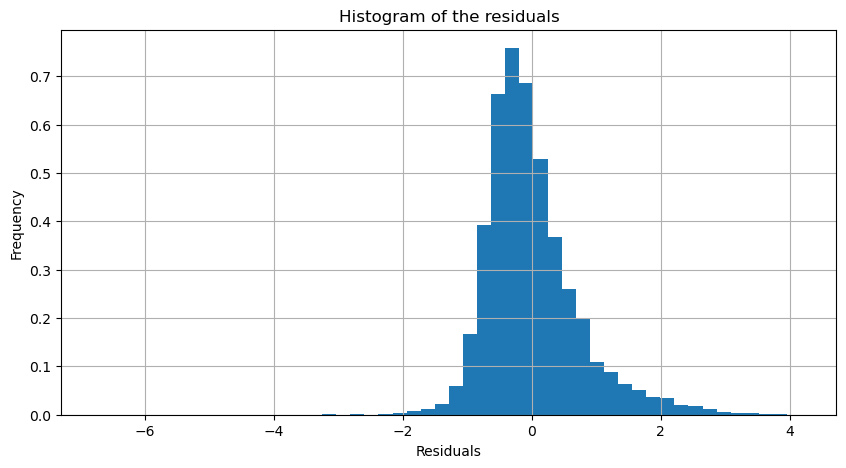

In [11]:
# Plot the histogram of the residuals
plt.figure(figsize=(10, 5))
plt.hist(residuals, bins=50, density=True, label='Residuals')
plt.title('Histogram of the residuals')
plt.ylabel('Frequency')
plt.xlabel('Residuals')
plt.grid()
plt.show()

The residuals are centered around zero, which suggests that on average, the model predictions are unbiased. The histogram resembles a normal distribution, which is bell-shaped and symmetric about the mean. This is a good indication that the errors in the model are normally distributed, which is an assumption in many statistical models, including linear regression.

The majority of the residuals fall within -2 and 2, with tails extending slightly beyond this range. This range indicates the common deviation of the predictions from the actual values. There do not appear to be significant outliers, as there are no bars at the extremes of the x-axis, which would indicate residuals that are far from the mean.

The residuals seem to have a constant spread throughout the range, which is an indication of homoscedasticity (constant variance of residuals), another assumption of linear regression models. It suggests that the model is performing well in terms of the assumptions underlying the model: the residuals are normally distributed, there are no obvious outliers, and the variance of the residuals is constant. 

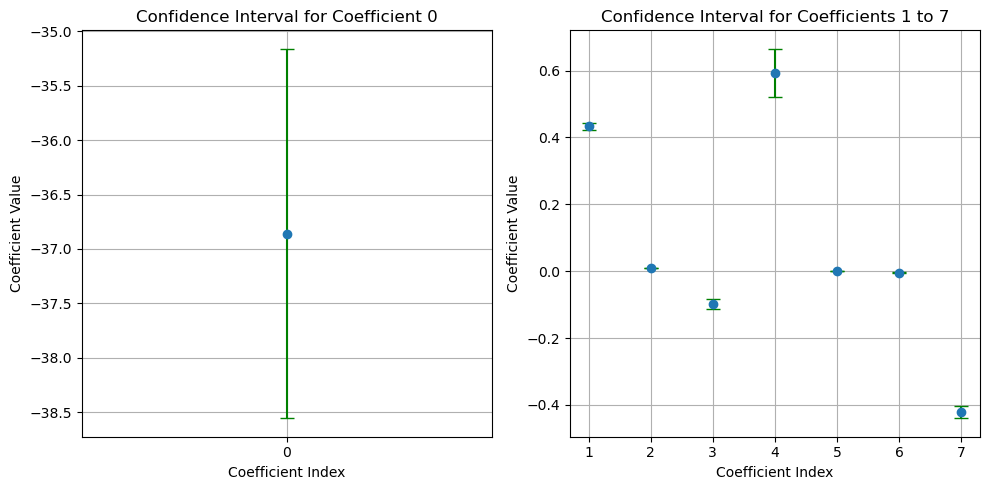

In [12]:
means = [(ci[0] + ci[1]) / 2 for ci in conf_intervals]
errors = [(ci[1] - ci[0]) / 2 for ci in conf_intervals]

# Plot the CI for the coefficients of the model (se ve horrible)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Subplot para el coeficiente 0
axs[0].errorbar(0, means[0], yerr=errors[0], fmt='o', ecolor='green', capsize=5)
axs[0].set_title('Confidence Interval for Coefficient 0')
axs[0].set_xlabel('Coefficient Index')
axs[0].set_ylabel('Coefficient Value')
axs[0].grid(True)
axs[0].set_xticks([0])

# Subplot para los demás coeficientes
axs[1].errorbar(range(1, len(means)), means[1:], yerr=errors[1:], fmt='o', ecolor='green', capsize=5)
axs[1].set_title('Confidence Interval for Coefficients 1 to 7')
axs[1].set_xlabel('Coefficient Index')
axs[1].set_ylabel('Coefficient Value')
axs[1].grid(True)
axs[1].set_xticks(range(1, len(means)))

# Ajustar el layout
plt.tight_layout()
plt.show()


1. **Confidence Interval for Coefficient 0:**
   - This is the confidence interval for the intercept term of the model.
   - The point estimate is around -37.
   - The confidence interval is quite wide, suggesting there's a significant amount of uncertainty about the intercept's value.
   - The interval does not contain 0, which typically suggests that the intercept is significantly different from 0, although the interpretation depends on the context of the model.

2. **Right Graph - Confidence Interval for Coefficients 1 to 7:**
   - These are confidence intervals for other predictors in the model.
   - The point estimates for these coefficients are much closer to zero compared to the intercept, indicating smaller effects on the response variable.
   - The confidence intervals for coefficients 1 and 3 to 7 include 0, which usually indicates that at a typical confidence level (such as 95%), these coefficients are not significantly different from zero. In other words, they may not contribute meaningfully to the model.
   - The confidence interval for coefficient 2 does not include 0, suggesting that this coefficient is statistically significant and has a positive effect on the response variable.

2. For the rest of the TP, we use the dataset in eCampus data. Load and preprocess the data.

In [13]:
data = pd.read_csv('data.csv')

(a) Separate the data in train and test sets: save one fourth of the data as testing (``train_test_split`` from ``sklearn.model_selection`` with the random seed set to 0 and standardize both the training and testing sets using the ``fit_transform`` and transform functions in ``sklearn.preprocessing.StandardScaler``.

In [14]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

(b) Fit a regular OLS

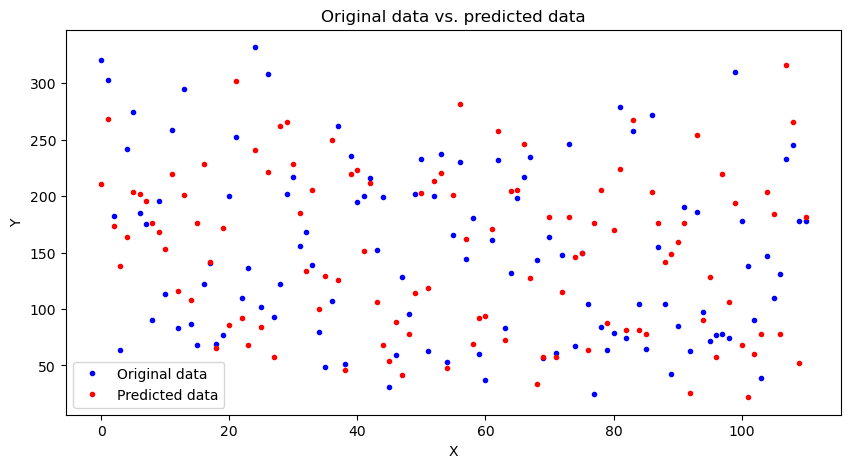

In [15]:
regressor = LinearRegression()
theta_hat = regressor.fit(X_train, y_train)

plt.figure(figsize=(10, 5))
plt.plot(y_test, 'b.', label='Original data')
plt.plot(regressor.predict(X_test), 'r.', label='Predicted data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Original data vs. predicted data')
plt.legend()
plt.show()

## Variable selection

3. Program the method of forward variable selection based on hypothesis tests for regression coefficients. This method starts from an empty set of variables S and at each iteration selects one variable relevant for predicting *y* and includes it in the set S. It runs until a halting condition is met. The coding process is as follows:

(a) Develop a function that, given a dataset $X \in R^{n \times p}$ and $y$, fits $p$ linear regression models, each using only feature $X_j$ to predict $y$. For each model, conduct a test of no effect, as discussed in session 3, and compute the p-value of the test. This function should return the coefficient with the smallest p-value. Explain the significance of the p-value in this context.

**P-VALUE**

The p-value in the context of forward variable selection for regression models is a measure of the evidence against a null hypothesis. In regression, the null hypothesis typically states that a particular coefficient (representing the effect of a predictor variable) is equal to zero, which would imply that the predictor has no effect on the response variable.

In the forward selection process, the p-value for each predictor's coefficient is used to determine whether the predictor provides significant information about the response variable that is not already explained by the predictors currently in the model. A small p-value (usually less than a chosen significance level like 0.05) indicates that there is strong evidence against the null hypothesis, suggesting that the predictor does have a significant effect on the response variable.

A low p-value suggests that including the predictor in the model will improve the model's ability to explain the variability in the response variable. Forward selection uses the p-value as a criterion for adding variables to the model. The variable with the lowest p-value is selected to enter the model first because it is considered the most statistically significant predictor at that step. Using a threshold p-value as a halting condition helps to prevent overfitting. Overfitting happens when the model becomes too complex and starts to capture noise rather than the underlying relationship. Stopping when the p-value exceeds a threshold ensures that only predictors with strong evidence of an effect are included.

(b) Apply the function iteratively. At each iteration, select the feature $X_f$ with the smallest p-value and:
    
- Include it in the set S.
- Remove it from X.
- Subtract from y the residuals of the model fit with feature $X_f$. Elaborate on the reason for subtracting the residuals.

**RESIDUALS**

1. **Remove Explained Variation:** When a variable is selected and its corresponding linear model is fit to the data, the residuals represent the part of the response that is not explained by the model. By subtracting these residuals from the original response variable, you effectively remove the variation that has been explained by the included predictors.

2. **Isolate Unexplained Variation:** The remaining variation in the response, after subtracting the explained part, is what the next predictor in the selection process needs to account for. This process is iterated: at each step, the model is fit to the residual variation not explained by the current set of predictors.

3. **Orthogonality of Predictors:** This process ensures that the predictors added to the model explain unique portions of the variance in the response variable. It avoids redundancy in the model where multiple predictors explain the same variation in the response.

(c) Add a halting condition to the algorithm: Stop adding features to the set S when the p-value exceeds 0.05. Plot the p-values for every coefficient for the first 5 iterations (all in the same plot)

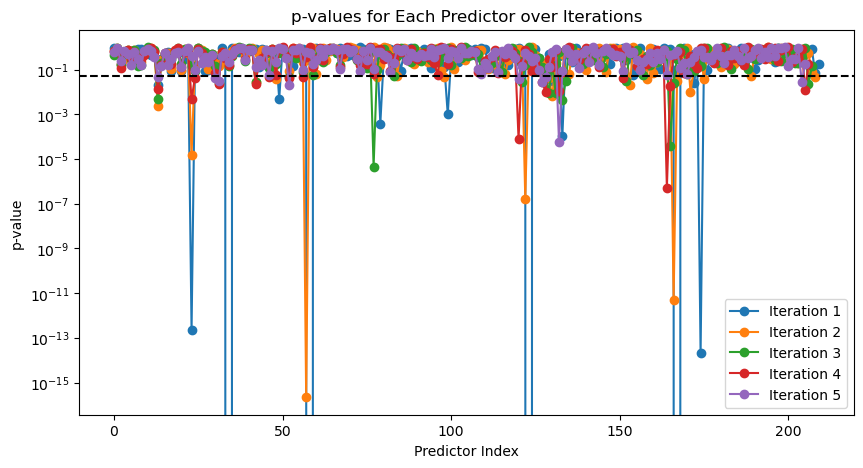

In [39]:
def fit_single_predictor_models(X, y):
    
    n, p = X.shape
    p_values = []
    best_t_stat = 0
    best_p_value = 1
    best_coefficient_index = -1
    best_model_coefficients = np.zeros(p)

    # Iterate over each predictor
    for j in range(p):
        
        # Fit model for predictor j
        X_j = X[:, j].reshape(-1, 1)
        X_j_with_intercept = np.hstack((np.ones((n, 1)), X_j))
        theta_hat = inv(X_j_with_intercept.T @ X_j_with_intercept) @ X_j_with_intercept.T @ y

        # Compute residuals and estimate variance
        residuals = y - X_j_with_intercept @ theta_hat
        sigma_squared_hat = (residuals.T @ residuals) / (n - 2)

        # Calculate standard error and t-statistic for coefficient
        se = np.sqrt(sigma_squared_hat * inv(X_j_with_intercept.T @ X_j_with_intercept)[1, 1])
        t_stat = theta_hat[1] / se

        # Compute two-tailed p-value
        p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df=n-2))

        p_values.append(p_value)

        # Check if this is the smallest p-value so far
        if p_value < best_p_value:
            best_p_value = p_value
            best_t_stat = t_stat
            best_coefficient_index = j
            best_model_coefficients = theta_hat

    return best_coefficient_index, best_p_value, best_model_coefficients, p_values

# Define the forward selection function
def forward_selection(X, y, significance_level=0.05):

    selected_features = []
    p_values_over_iterations = []
    current_residuals = y.copy()

    while True:

        # Fit models and find the best predictor
        best_index, best_p_value, best_model_coefficients, p_values = fit_single_predictor_models(X, current_residuals)

        # Store p-values for plotting
        p_values_over_iterations.append(p_values)

        # Halting condition
        if best_p_value > significance_level:
            break

        # Update selected features and residuals
        selected_features.append(best_index)

        # Update residuals
        X_f = X[:, best_index].reshape(-1, 1)
        X_f_with_intercept = np.hstack((np.ones((X_f.shape[0], 1)), X_f))
        y_pred = X_f_with_intercept @ best_model_coefficients
        current_residuals -= y_pred.squeeze()  

        # Remove the selected feature from X
        X = np.delete(X, best_index, axis=1)

    return selected_features, p_values_over_iterations

# Plotting function
def plot_p_values(p_values_over_iterations):
    plt.figure(figsize=(10, 5))
    for i, p_values in enumerate(p_values_over_iterations):
        plt.plot(p_values, label=f'Iteration {i+1}', marker = 'o')

    plt.axhline( y = 0.05, linestyle = '--', color = 'black')
    plt.xlabel('Predictor Index')
    plt.ylabel('p-value')
    plt.title('p-values for Each Predictor over Iterations')
    plt.legend()
    plt.yscale('log')  # Use logarithmic scale for better visibility
    plt.show()

# Perform forward selection on the synthetic data
selected_features, p_values_over_iterations = forward_selection(X_train, y_train)

# Plot the p-values
plot_p_values(p_values_over_iterations[0:5])

The graph depicts p-values for each predictor over multiple iterations of a forward selection process in a regression model. Each line represents an iteration, and each dot represents a predictor variable, with its p-value on a logarithmic scale:

1. **Changes Over Iterations:** As the model includes more variables, the p-values for the remaining variables tend to increase, which is expected because the model is accounting for more of the variance in the response variable, leaving less unexplained variance for additional variables to explain.

2. **Significance of Predictors:** In the first iteration, several predictors have very low p-values, indicating strong evidence against the null hypothesis of no effect. As iterations proceed, fewer predictors remain significantly below the threshold, indicating that the most significant predictors are being selected first.

3. **Saturation Point:** By iteration 5, it seems that most of the predictors' p-values have risen above the significance threshold, suggesting that additional predictors may not contribute significant explanatory power to the model.

## Extensions

4. Run ridge regression using scikit-learn on the training set. Run the code for 30 different values of
the penalty parameter, which should be on a logarithmic scale between $10^{-1}$ and $10^6$. Display two
subplots at the end:

   (a) The first subplot should show the evolution of the coefficients for each different value of the
penalty parameter.

   (b) The second subplot should display the evolution of the R-squared coefficient at each of the 30
iterations

In [17]:
def coefficients(method, alphas, X, y):
    # Initialize lists to store the results
    train_errors = []
    coefficients = []

    # Loop over alpha values
    for alpha in alphas:
        
        if method == 'Ridge':
            # Fit ridge regression model
            model = Ridge(alpha=alpha)

        elif method == 'Lasso':
            # Fit LASSO model
            model = Lasso(alpha=alpha)

        elif method == 'ElasticNet':
            # Fit ElasticNet model
            model = ElasticNet(alpha=alpha, l1_ratio=0.5)

        model.fit(X, y)
        
        # Evaluate train
        train_errors.append(model.score(X, y))
        
        # Store model coefficients
        coefficients.append(model.coef_)

    # Plots 
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    fig.suptitle(f'{method} Regression')

    # Plot the evolution of the coefficients
    ax1.plot(alphas, coefficients)
    ax1.set_xlabel('alpha')
    ax1.set_ylabel('coefficients')
    ax1.set_xscale('log')
    ax1.set_title('Evolution of the coefficients')

    # Plot the evolution of the R-squared coefficient
    ax2.plot(alphas, train_errors, color='blue', marker='o')
    ax2.set_xlabel('alpha')
    ax2.set_ylabel('R-squared')
    ax2.set_xscale('log')
    ax2.set_title('Evolution of the R-squared coefficient')

    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the figure
    plt.show()

# Define the range of alpha values to test
alphas = np.logspace(-1, 6, 30)

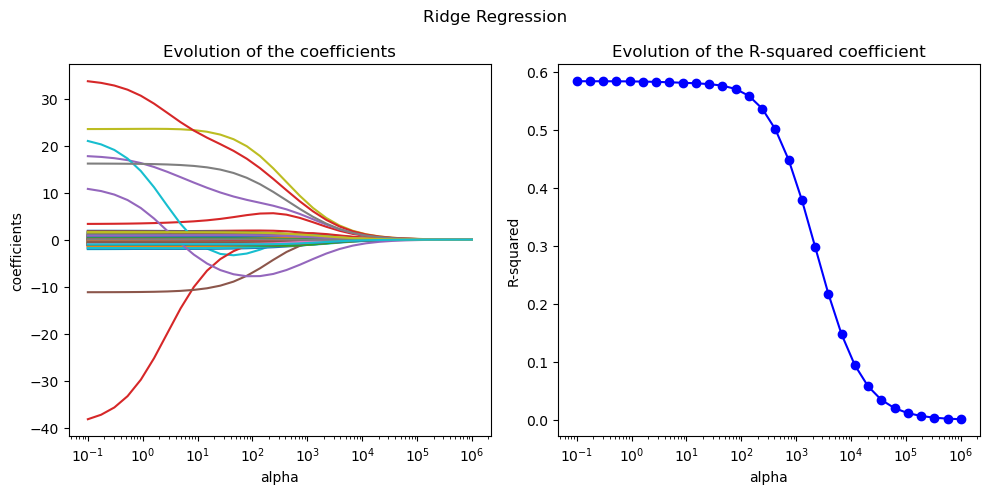

In [18]:
coefficients("Ridge", alphas, X_train, y_train)

5. Run the code for Lasso as explained in Point 4. Run the code for 30 different values of the penalty
parameter, which should be on a logarithmic scale between $10^{-3}$ and $10^2$

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.172e+05, tolerance: 1.963e+02
  model = cd_fast.enet_coordinate_descent(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.161e+05, tolerance: 1.963e+02
  model = cd_fast.enet_coordinate_descent(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.858e+04, toleranc

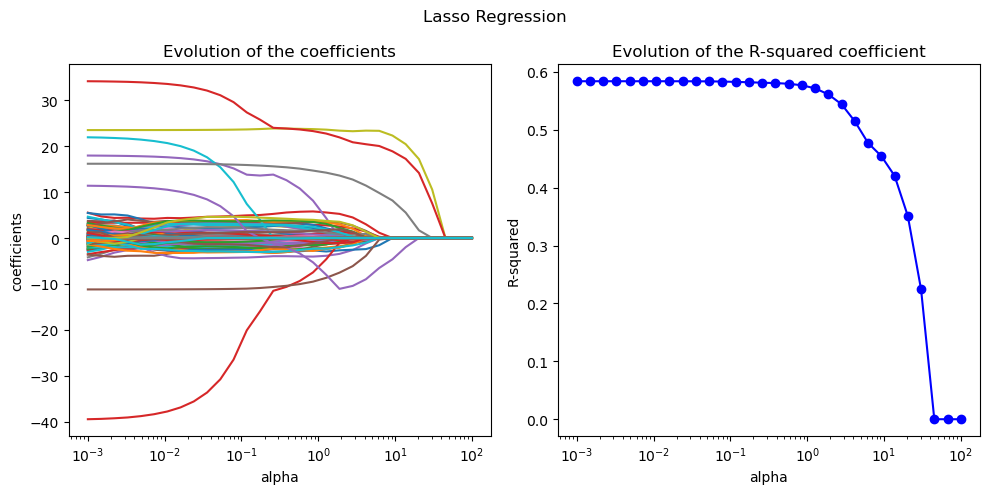

In [19]:
alphas = np.logspace(-3, 2, 30)
coefficients("Lasso", alphas, X_train, y_train)

6. Run the code for ElasticNet as explained in Point 4. Run the code for 30 different values of the
penalty parameter, which should be on a logarithmic scale between $10^{-3}$ and $10^2$.

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.836e+05, tolerance: 1.963e+02
  model = cd_fast.enet_coordinate_descent(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.345e+05, tolerance: 1.963e+02
  model = cd_fast.enet_coordinate_descent(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.132e+05, toleranc

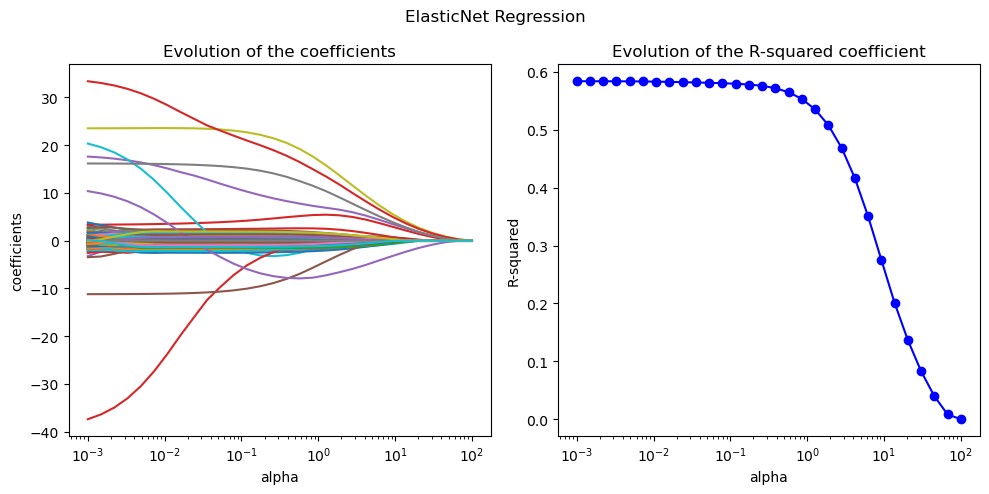

In [20]:
coefficients("ElasticNet", alphas, X_train, y_train)

**Ridge Regression:**
1. As alpha increases, the magnitude of the coefficients generally decreases towards zero. This is characteristic of Ridge regression, which applies L2 regularization and tends to shrink coefficients evenly.
2. The R-squared value initially stays relatively stable but begins to drop significantly as alpha becomes too large. This indicates that the model's fit to the data worsens as the regularization becomes overly strong, potentially underfitting the data.

**Lasso Regression :**
1. Similar to Ridge, the coefficients shrink towards zero as alpha increases. However, Lasso uses L1 regularization, which can reduce some coefficients exactly to zero, effectively performing variable selection.
2. The R-squared shows a sharp drop after a certain alpha value, suggesting that the model's explanatory power decreases as more coefficients are set to zero, possibly leading to underfitting.

**ElasticNet Regression :**
1. The coefficients' paths are intermediate between Ridge and Lasso. ElasticNet combines L1 and L2 regularization, which can shrink coefficients towards zero like Lasso, while still retaining a Ridge-like penalty that tends to shrink all coefficients evenly.
2. The R-squared decreases in a pattern similar to Lasso, but the decline is generally more gradual, reflecting the combined effects of L1 and L2 penalties.

These graphs illustrate the impact of regularization on the coefficients and the model's explanatory power. The key takeaway is that a proper balance of alpha is crucial:

- Too low, and it might not sufficiently penalize complexity, risking overfitting.
- Too high, and the model becomes overly simplified, risking underfitting and losing predictive power.

The optimal alpha usually lies somewhere in between, where the model achieves a balance between complexity (to capture the underlying data structure) and generalization (to perform well on unseen data). The choice of alpha can be made using cross-validation techniques to find the value that minimizes prediction error on a validation set.

## PCR

7. Compute the singular value decomposition of the covariance matrix. For consistency in the notation
use $U, s, V = SVD(X^T X)$.

In [21]:
U, s, V = np.linalg.svd(np.dot(X_train.T, X_train))

(a) Plot a heatmap of the covariance matrix.

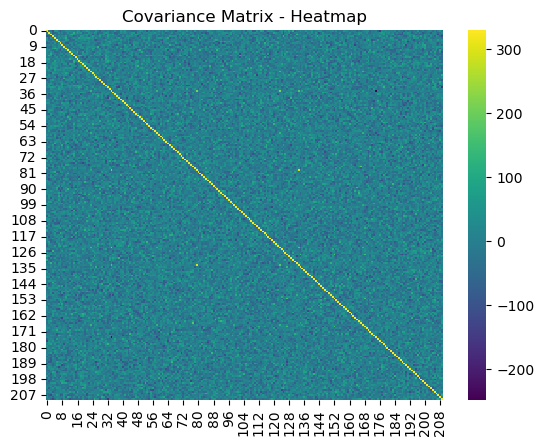

In [22]:
import seaborn as sns

sns.heatmap(X_train.T.dot(X_train), cmap='viridis')
plt.title('Covariance Matrix - Heatmap')
plt.show()

1. **Pattern Observation:**
   - The majority of the matrix is green, indicating that most pairs of variables do not have a strong linear relationship, as their covariances are close to zero.
   - There are some spots of yellow, suggesting some pairs of variables have a positive covariance, indicating a positive linear relationship.
   - The absence of prominent blue or purple areas suggests there are few, if any, pairs of variables with a strong negative covariance.

2. **Implications for Analysis:**
   - The lack of strong covariance between most variables suggests that there might not be much redundancy in the data. This could imply that the dataset has a good level of feature independence, which is often desirable in predictive modeling.
   - The presence of some variables with higher positive covariance could indicate potential multicollinearity if those variables are used together in a model.

(b) Compute the PCA for the data using the SVD

In [23]:
# Principal Components are the columns of V 
principal_components = V.T

# Calculate Scores (projection of data onto principal components)
scores = np.dot(X_train, principal_components)

# Calculate Variance Explained
variance_explained = np.square(s) / np.sum(np.square(s))

# Keep components that explain 90% of the variance
variance_cutoff = 0.90
cumulative_variance = np.cumsum(variance_explained)
num_components = np.where(cumulative_variance >= variance_cutoff)[0][0] + 1

# Use first 'num_components' principal components and scores
principal_components_reduced = principal_components[:, :num_components]
scores_reduced = scores[:, :num_components]


(c) Plot the amount of variance explained by the first $k$ components for $k \in 2 \cdots p.$ How many
variables do we need to explain more than 90% of the variance?

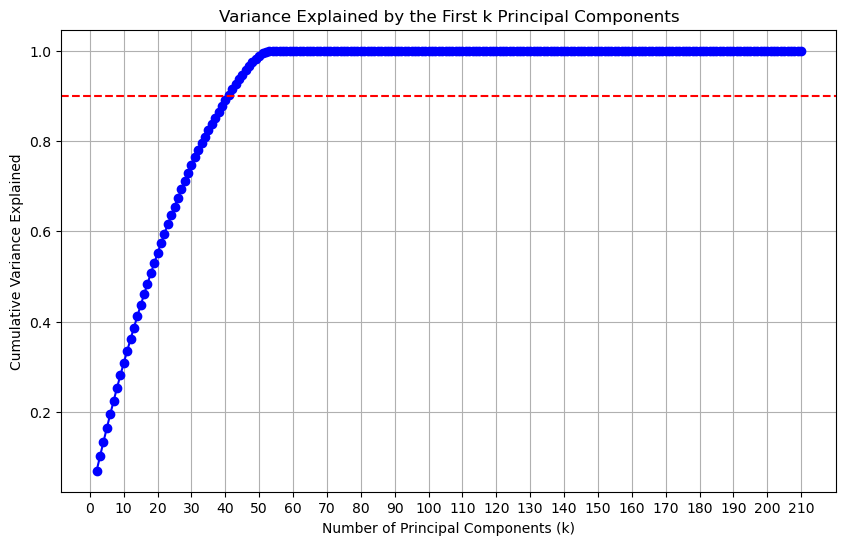

In [24]:
import numpy as np
import matplotlib.pyplot as plt

cumulative_variance = np.cumsum(variance_explained)
p = X_train.shape[1]  # number of features
ks = np.arange(2, p+1)

# Plotting the variance explained
plt.figure(figsize=(10, 6))
plt.plot(ks, cumulative_variance[1:], marker='o', color='blue')
plt.axhline( y = 0.9, linestyle = '--', color = 'red')
plt.title('Variance Explained by the First k Principal Components')
plt.xlabel('Number of Principal Components (k)')
plt.ylabel('Cumulative Variance Explained')
plt.xticks(np.arange(0, p+1, 10))  # Show only multiples of 10 on the x-axis
plt.grid(True)
plt.show()


In [25]:
print("\nNumber of Components (90% variance):\n", num_components)


Number of Components (90% variance):
 41


The curve rises steeply at the beginning, indicating that the first few principal components explain a significant portion of the variance in the dataset. There is an 'elbow' in the graph, typically the point after which the rate of increase in explained variance slows down significantly. This often indicates a suitable number of components to choose for dimensionality reduction while still capturing most of the variability in the data. The curve levels off towards a plateau, suggesting that additional components beyond this point contribute little to explaining the variability of the data. 

(d) Plot the projected data with $k = 2$ using as color the value of $y$ and interpret the plot

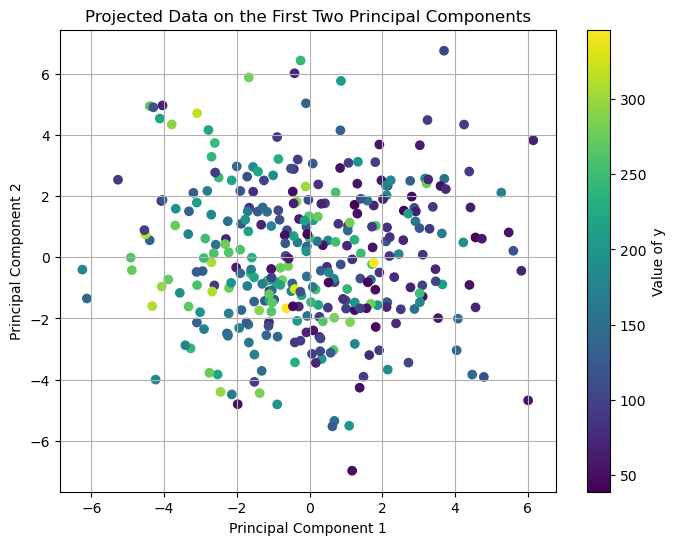

In [26]:
# Project data onto the first two principal components
k = 2
principal_components = V.T[:, :k]
projected_data = X_train.dot(principal_components)

# Plotting the projected data
plt.figure(figsize=(8, 6))
scatter = plt.scatter(projected_data[:, 0], projected_data[:, 1], c = y_train, cmap='viridis')
plt.colorbar(scatter, label='Value of y')
plt.title('Projected Data on the First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


- **Spread of Data**: The spread of the data along the principal component axes indicates the variance captured by each component. A wider spread along an axis suggests more variance is captured by that component.
  
- **Clusters and Patterns**: Any apparent clusters might suggest groups within the data that share similar properties. If certain colors (indicating similar values of $ y $) are clustered, it could imply that the corresponding data points have something in common.

- **Color Gradient**: If there is a gradient of color along a particular direction, it may indicate a correlation between the dependent variable $ y $ and the data's structure as captured by the principal components. For example, if darker colors (which represent higher values of $ y $) trend towards one side of the plot, $ y $ might increase in the direction of one of the principal components.

- **Outliers**: Points that are far away from the main cloud of points could be outliers. If these outliers also have extreme values of $ y $, they could be particularly influential or important points to consider in further analyses.

(e) Plot the the two first principal directions.

C:\Users\lmcastanedame\AppData\Local\Temp\ipykernel_14200\1323996460.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(principal_components[:, 0], principal_components[:, 1], cmap='viridis', alpha=0.5)


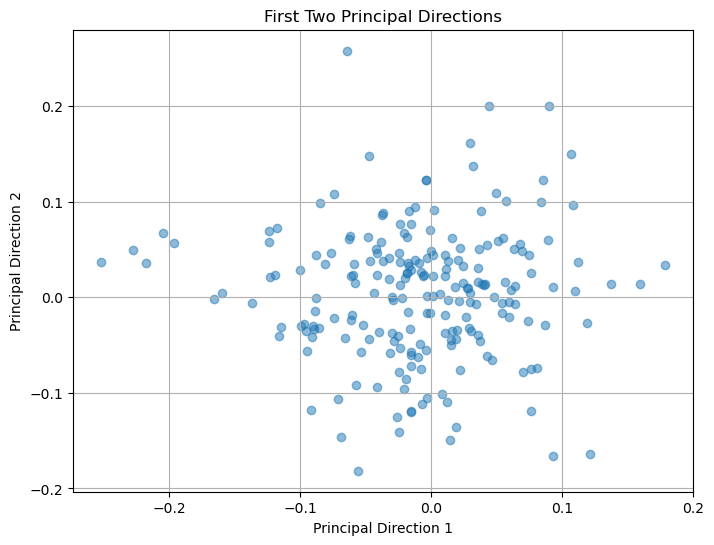

In [27]:
# Plotting the first two principal directions
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], cmap='viridis', alpha=0.5)
plt.title('First Two Principal Directions')
plt.xlabel('Principal Direction 1')
plt.ylabel('Principal Direction 2')
plt.grid(True)
plt.show()


- **Distribution of Data Points**: The data is centered around the origin (0,0), which is typical after a PCA where the data is often mean-centered before performing the analysis.

- **Spread along Principal Directions**: There seems to be a relatively even spread along both principal directions, but without a clear, distinct pattern of variance along either direction. If one direction had a significantly wider spread, it would indicate that it captures more variance.

- **Clustering**: There is no obvious clustering of data points into separate groups. The points are somewhat evenly distributed across the space defined by the two principal directions, with no clear separation into distinct subgroups.

- **Outliers**: There do not appear to be any extreme outliers far from the center. Most data points are within a close range to the origin, indicating no extreme values in the data when transformed into the principal component space.

- **Symmetry**: The distribution looks fairly symmetrical about both axes, which could indicate that the two principal components are capturing similar amounts of variance.

In a PCA plot like this, the axes (principal directions) don't have inherent meaning by themselves; they are synthetic axes that represent linear combinations of the original variables designed to maximize variance. The plot is used to visualize the data in the reduced-dimension space and to possibly identify patterns, clusters, or outliers. The absence of distinct clustering suggests that the data may not have clear, separable subgroups based on the first two principal components alone. Further analysis could involve looking at additional components, or applying different techniques to better understand the structure of the data.

(f) Run OLS on the projected data (PCR) using k components for $k < 50$. Select the $k$ that returns the best score of the OLS model and plot the evolution of the scores with $k$.

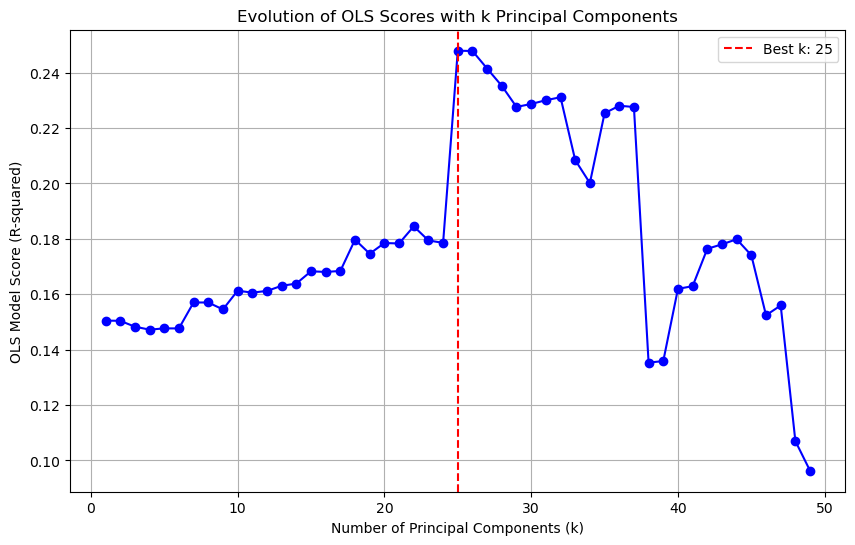

(25, 0.24793525650273773)

In [28]:
# Initialize lists to store results
k_values = list(range(1, 50))
scores = []

# Loop over the number of components k
for k in k_values:
    # Project the data onto k principal components
    X_train_pca = np.dot(X_train, V.T[:, :k])
    X_test_pca = np.dot(X_test, V.T[:, :k])
    
    # Run OLS regression on the projected data
    model = LinearRegression()
    model.fit(X_train_pca, y_train)
    
    # Predict on the test data
    y_pred = model.predict(X_test_pca)
    
    # Calculate the score (e.g., R-squared) and append to the list
    score = r2_score(y_test, y_pred)
    scores.append(score)

# Select k with the best score
best_score = max(scores)
best_k = k_values[scores.index(best_score)]

# Plot the evolution of scores with k
plt.figure(figsize=(10, 6))
plt.plot(k_values, scores, marker='o', color='blue')
plt.title('Evolution of OLS Scores with k Principal Components')
plt.xlabel('Number of Principal Components (k)')
plt.ylabel('OLS Model Score (R-squared)')
plt.axvline(best_k, color='r', linestyle='--', label=f'Best k: {best_k}')
plt.legend()
plt.grid(True)
plt.show()

# Output the best k and the corresponding score
best_k, best_score

The R-squared values initially increase with the number of principal components, which suggests that adding more components improves the model's explanatory power up to a point. The dashed red line at k=25 indicates the number of components that resulted in the best OLS model score in this analysis. This suggests that beyond 25 components, the additional complexity does not significantly improve the model's performance. After a certain number of components, the R-squared values show volatility and, towards the end, a steep decline. This could indicate overfitting, where the inclusion of too many components starts to model the noise in the data rather than the underlying relationship. 

## Comparison of the models

8. Summarize the results of the models and elaborate in their main characteristics. Plot all the training and testing errors for all the models considered and elaborate on the results.

### Plots comparing the actual target values with the predicted values for each model 

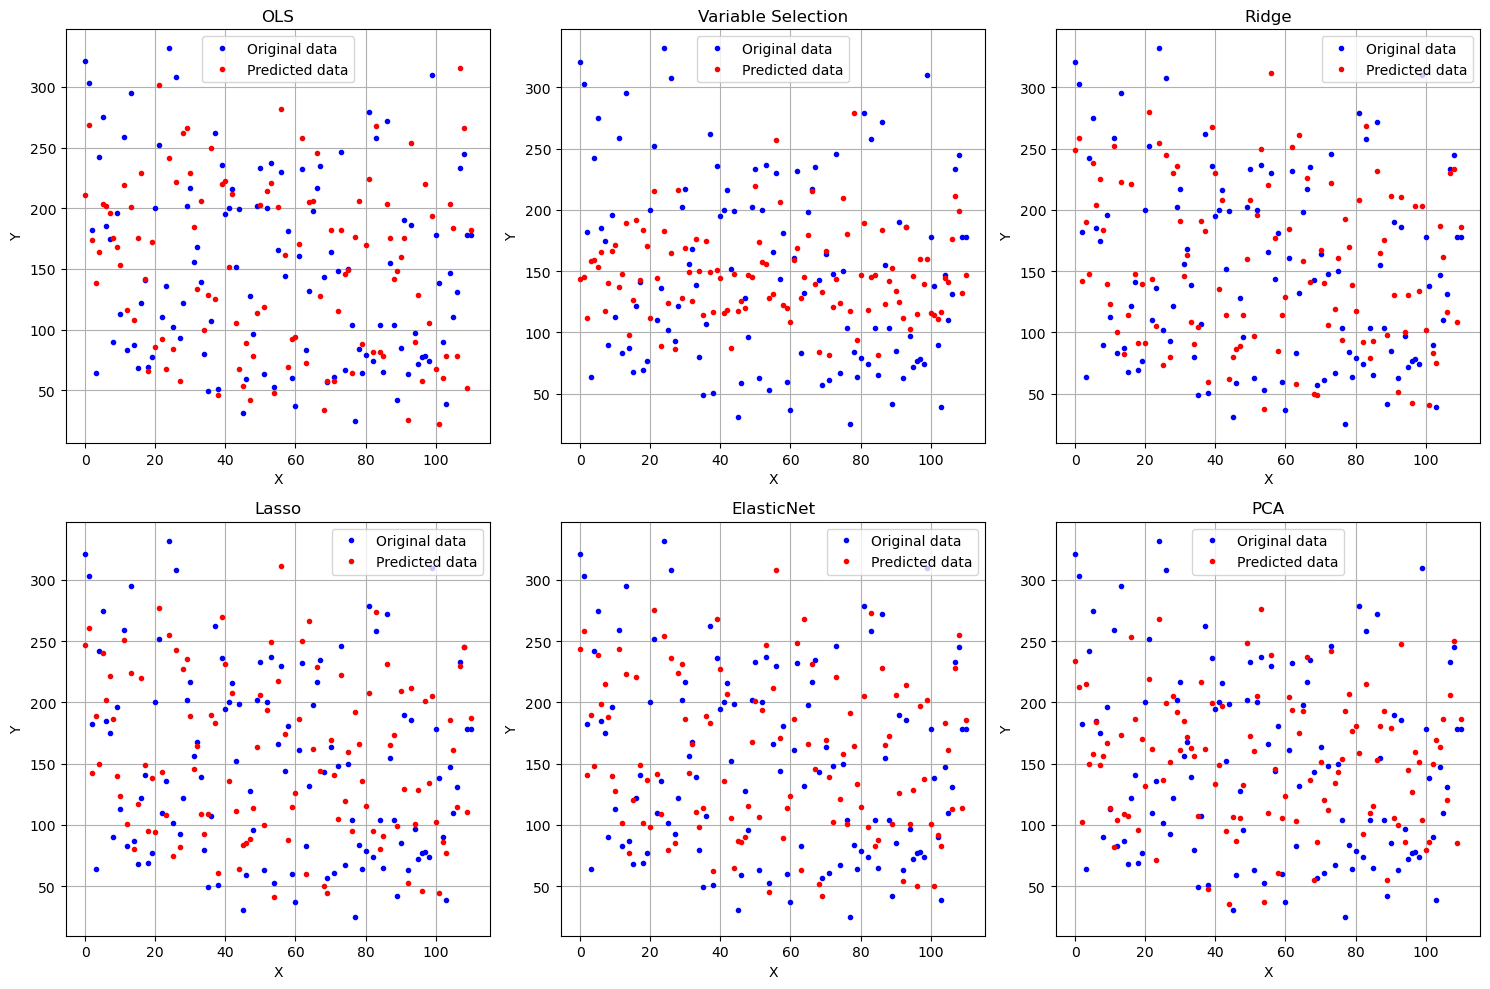

In [29]:
plt.figure(figsize=(15, 10))

# Subplot 1: OLS
OLS = LinearRegression()
OLS.fit(X_train, y_train)

plt.subplot(2, 3, 1)
plt.plot(y_test, 'b.', label='Original data')
plt.plot(OLS.predict(X_test), 'r.', label='Predicted data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('OLS')
plt.legend()
plt.grid(True)

# Subplot 2: Variable Selection
Vselect = LinearRegression()
Vselect.fit(X_train[:, selected_features], y_train)

plt.subplot(2, 3, 2)
plt.plot(y_test, 'b.', label='Original data')
plt.plot(Vselect.predict(X_test[:, selected_features]), 'r.', label='Predicted data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Variable Selection')
plt.legend()
plt.grid(True)

# Subplot 3: Ridge
Ridge_ = Ridge(alpha=0.1)
Ridge_.fit(X_train, y_train)

plt.subplot(2, 3, 3)
plt.plot(y_test, 'b.', label='Original data')
plt.plot(Ridge_.predict(X_test), 'r.', label='Predicted data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Ridge')
plt.legend()
plt.grid(True)

# Subplot 4: Lasso
Lasso_ = Lasso(alpha=0.1)
Lasso_.fit(X_train, y_train)

plt.subplot(2, 3, 4)
plt.plot(y_test, 'b.', label='Original data')
plt.plot(Lasso_.predict(X_test), 'r.', label='Predicted data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Lasso')
plt.legend()
plt.grid(True)

# Subplot 5: ElasticNet
ElasticN_ = ElasticNet(alpha=0.1, l1_ratio=0.5)
ElasticN_.fit(X_train, y_train)

plt.subplot(2, 3, 5)
plt.plot(y_test, 'b.', label='Original data')
plt.plot(ElasticN_.predict(X_test), 'r.', label='Predicted data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('ElasticNet')
plt.legend()
plt.grid(True)

# Subplot 6: PCA
PCR = LinearRegression()
PCR.fit(X_train_pca, y_train)

plt.subplot(2, 3, 6)
plt.plot(y_test, 'b.', label='Original data')
plt.plot(PCR.predict(X_test_pca), 'r.', label='Predicted data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('PCA')
plt.legend()
plt.grid(True)

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

- The predictions of the OLS model are scattered and do not seem to closely follow a specific trend with the actual data points. There's a fair amount of deviation from the line y = x, which would indicate perfect predictions. 

- The model with Forward variable Selection appears to have a similar performance to OLS in terms of the scatter of predictions. This could indicate that the variable selection method used didn't significantly improve the model's predictive capabilities compared to the full OLS model. 

- The Ridge regression model, which uses L2 regularization, shows a slightly tighter cluster of predicted points around the actual points, suggesting a potential improvement in prediction accuracy over the basic OLS model. 

- The Lasso regression, with L1 regularization leading to sparser solutions, also displays a distribution of predictions similar to Ridge. There might be a slightly increased concentration of points around the lower range, which could suggest better performance for lower target values. 

- The ElasticNet, combining L1 and L2 regularization, doesn't show a marked difference from the Lasso or Ridge in terms of prediction scatter. This model is expected to perform better when there are correlations in the data, but the plot does not provide enough information to assess this. 

- The PCA plot shows predictions that are quite dispersed, indicating that reducing dimensionality to principal components did not necessarily lead to better predictions for this particular dataset.

It's noticeable that all models seem to struggle with predicting higher values (y > 200), as seen by the greater spread in that region. 

### Trainning and Testing errors for each model

In [30]:
# OLS model ----------------------------------------------------------------------------------------

# Plot the trainning and testing errors of the regular OLS regression model
train_errors_OLS, test_errors_OLS = [], []
OLS = LinearRegression()
for m in range(1, len(X_train)):
    OLS.fit(X_train[:m], y_train[:m])
    y_train_predict = OLS.predict(X_train[:m])
    y_test_predict = OLS.predict(X_test)
    train_errors_OLS.append(mean_squared_error(y_train[:m], y_train_predict))
    test_errors_OLS.append(mean_squared_error(y_test, y_test_predict))

# Variable Selection model --------------------------------------------------------------------------

# With the selected features, fit a linear regression model
X_train_selected = X_train[:, selected_features]
X_train_selected_with_intercept = np.hstack((np.ones((X_train_selected.shape[0], 1)), X_train_selected))
theta_hat = inv(X_train_selected_with_intercept.T @ X_train_selected_with_intercept) @ X_train_selected_with_intercept.T @ y_train

VSelect = LinearRegression()
# Plot the trainning and testing errors of the new model
train_errors_Vselect, test_errors_Vselect = [], []
for m in range(1, len(X_train_selected)):
    VSelect.fit(X_train_selected[:m], y_train[:m])
    y_train_predict = VSelect.predict(X_train_selected[:m])
    y_test_predict = VSelect.predict(X_test[:, selected_features])
    train_errors_Vselect.append(mean_squared_error(y_train[:m], y_train_predict))
    test_errors_Vselect.append(mean_squared_error(y_test, y_test_predict))

# Ridge ---------------------------------------------------------------------------------------------

# Plot the trainning and testing errors of the Ridge regression model
train_errors_Ridge, test_errors_Ridge = [], []
Ridge_ = Ridge(alpha=0.1)
for m in range(1, len(X_train)):
    Ridge_.fit(X_train[:m], y_train[:m])
    y_train_predict = Ridge_.predict(X_train[:m])
    y_test_predict = Ridge_.predict(X_test)
    train_errors_Ridge.append(mean_squared_error(y_train[:m], y_train_predict))
    test_errors_Ridge.append(mean_squared_error(y_test, y_test_predict))

# Lasso ---------------------------------------------------------------------------------------------

# Plot the trainning and testing errors of the Lasso regression model
train_errors_Lasso, test_errors_Lasso = [], []
Lasso_ = Lasso(alpha=0.1)
for m in range(1, len(X_train)):
    Lasso_.fit(X_train[:m], y_train[:m])
    y_train_predict = Lasso_.predict(X_train[:m])
    y_test_predict = Lasso_.predict(X_test)
    train_errors_Lasso.append(mean_squared_error(y_train[:m], y_train_predict))
    test_errors_Lasso.append(mean_squared_error(y_test, y_test_predict))

# ElasticNet ----------------------------------------------------------------------------------------

# Plot the trainning and testing errors of the ElasticNet regression model
train_errors_ENet, test_errors_ENet = [], []
ElasticN = ElasticNet(alpha=0.1, l1_ratio=0.5)
for m in range(1, len(X_train)):
    ElasticN.fit(X_train[:m], y_train[:m])
    y_train_predict = ElasticN.predict(X_train[:m])
    y_test_predict = ElasticN.predict(X_test)
    train_errors_ENet.append(mean_squared_error(y_train[:m], y_train_predict))
    test_errors_ENet.append(mean_squared_error(y_test, y_test_predict))

# PCA ------------------------------------------------------------------------------------------------

pca = PCA(n_components = 25)  # We found 25 to be optimal
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Plot the trainning and testing errors of the PCA regression model
train_errors_PCA, test_errors_PCA = [], []
PCR = LinearRegression()
for m in range(1, len(X_train_pca)):
    PCR.fit(X_train_pca[:m], y_train[:m])
    y_train_predict = PCR.predict(X_train_pca[:m])
    y_test_predict = PCR.predict(X_test_pca)
    train_errors_PCA.append(mean_squared_error(y_train[:m], y_train_predict))
    test_errors_PCA.append(mean_squared_error(y_test, y_test_predict))

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.360e+00, tolerance: 2.486e+00
  model = cd_fast.enet_coordinate_descent(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.995e+00, toleranc

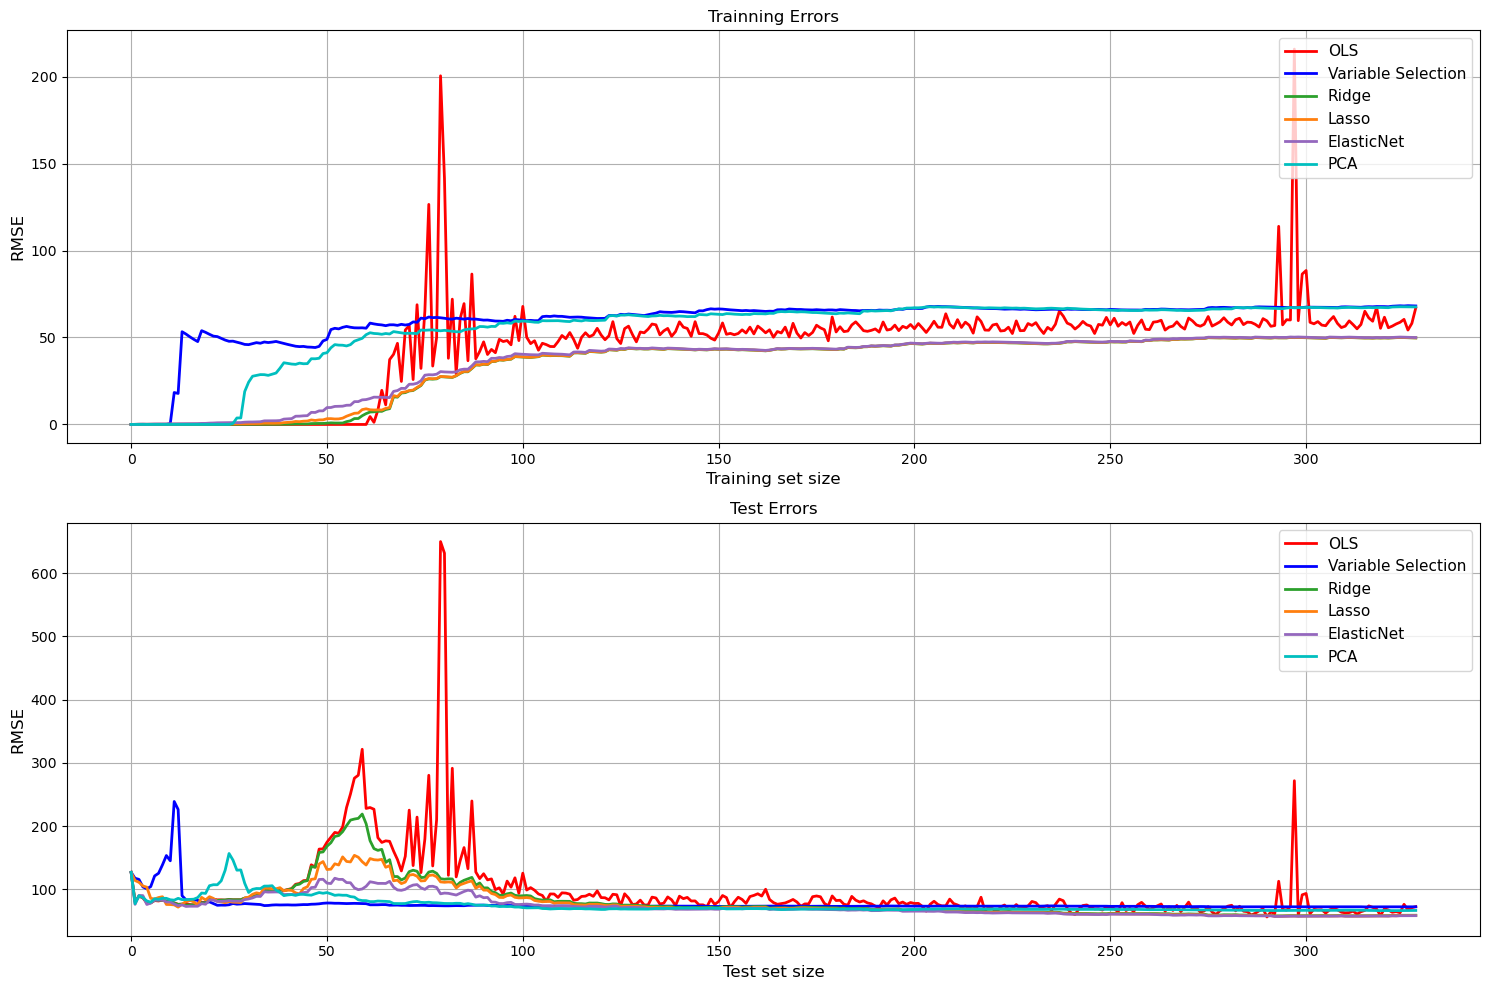

In [31]:
# Plot the trainning and testing errors of all the models
plt.figure(figsize=(15, 10))

# Subplot 1: Trainning Errors
plt.subplot(2, 1, 1)
plt.plot(np.sqrt(train_errors_OLS), "r-", linewidth=2, label="OLS")
plt.plot(np.sqrt(train_errors_Vselect), "b-", linewidth=2, label="Variable Selection")
plt.plot(np.sqrt(train_errors_Ridge), color="tab:green", linewidth=2, label="Ridge")
plt.plot(np.sqrt(train_errors_Lasso), color="tab:orange", linewidth=2, label="Lasso")
plt.plot(np.sqrt(train_errors_ENet), color="tab:purple", linewidth=2, label="ElasticNet")
plt.plot(np.sqrt(train_errors_PCA), "c-", linewidth=2, label="PCA")
plt.title("Trainning Errors")
plt.legend(loc="upper right", fontsize=11)
plt.xlabel("Training set size", fontsize=12)
plt.ylabel("RMSE", fontsize=12)
plt.grid(True)

# Subplot 2: Test Errors
plt.subplot(2, 1, 2)
plt.plot(np.sqrt(test_errors_OLS), "r-", linewidth=2, label="OLS")
plt.plot(np.sqrt(test_errors_Vselect), "b-", linewidth=2, label="Variable Selection")
plt.plot(np.sqrt(test_errors_Ridge), color="tab:green", linewidth=2, label="Ridge")
plt.plot(np.sqrt(test_errors_Lasso), color="tab:orange", linewidth=2, label="Lasso")
plt.plot(np.sqrt(test_errors_ENet), color="tab:purple", linewidth=2, label="ElasticNet")
plt.plot(np.sqrt(test_errors_PCA), "c-", linewidth=2, label="PCA")
plt.title("Test Errors")
plt.legend(loc="upper right", fontsize=11)
plt.xlabel("Test set size", fontsize=12)
plt.ylabel("RMSE", fontsize=12)
plt.grid(True)

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

**Training Errors :**

- **Overall Trends**: All models start with a higher RMSE when the training set size is small, which is expected due to overfitting. As more data points are added, the RMSE decreases, showing that the models generalize better with more data.

- **OLS and Variable Selection**: These models have similar performance trends and appear to converge as the training set size increases. The OLS model has some spikes in RMSE, which could be due to high variance in the training data or outliers that are influencing the model predictions.

- **Regularized Models (Ridge, Lasso, ElasticNet)**: These models show a smoother decrease in RMSE as the training set size increases, with fewer and less extreme spikes compared to OLS. This is indicative of the regularization helping to mitigate overfitting.

- **PCA**: The PCA-based model shows a higher variability in RMSE across different training set sizes. This might be due to the reduced feature set not capturing all the variance needed for accurate predictions or the choice of the number of components not being optimal across all training sizes.

**Test Errors :**

- **High Variability**: There is significant variability in the test RMSE, especially with smaller test set sizes. This can occur if the test set includes outliers or difficult-to-predict instances, or if the model has high variance.

- **OLS**: The OLS model seems to have the highest peaks in RMSE, indicating that it may be more sensitive to specific data points in the test set, possibly outliers or instances that deviate from the model's assumptions.

- **Variable Selection**: This model appears to have fewer and lower peaks than OLS, suggesting that the features selected are somewhat more robust to the variability in the test data.

- **Ridge and Lasso**: Both models exhibit relatively stable performance with gradual increases in test set size. The presence of regularization seems to provide a buffer against large swings in RMSE, which is a sign of better generalization.

- **ElasticNet**: The ElasticNet model has a performance trend that is similar to Ridge and Lasso, benefiting from the combination of L1 and L2 regularization effects.

- **PCA**: Similar to the training errors plot, the PCA model shows high variability in the test errors, which could be related to the reduction in feature space not aligning well with the test data.

Regularization (Ridge, Lasso, ElasticNet) seems to provide more stable error rates across different training and test set sizes, likely due to their ability to reduce model complexity and avoid overfitting. OLS and PCA show higher variability, which may suggest that these models are less robust to changes in the dataset.

The plots indicate that the dataset might have some influential points that are affecting the models, especially OLS and PCA. These could be outliers or leverage points. 

### $R^2$ scores for each model

In [34]:
OLS = LinearRegression()
OLS.fit(X_train, y_train)
R2_OLS = r2_score(y_test, OLS.predict(X_test))
VSelect = LinearRegression()
VSelect.fit(X_train[:, selected_features], y_train)
R2_Vselect = r2_score(y_test, VSelect.predict(X_test[:, selected_features]))  
Ridge_ = Ridge(alpha=0.1)
Ridge_.fit(X_train, y_train)
R2_Ridge = r2_score(y_test, Ridge_.predict(X_test))
Lasso_ = Lasso(alpha=0.1)
Lasso_.fit(X_train, y_train)
R2_Lasso = r2_score(y_test, Lasso_.predict(X_test))
ElasticN = ElasticNet(alpha=0.1, l1_ratio=0.5)
ElasticN.fit(X_train, y_train)
R2_ENet = r2_score(y_test, ElasticN.predict(X_test))
PCR = LinearRegression()
PCR.fit(X_train_pca, y_train)
R2_PCA = r2_score(y_test, PCR.predict(X_test_pca))

In [35]:
r2_scores = {
    'Model': ['OLS', 'Variable Selection', 'Ridge', 'Lasso', 'ElasticNet', 'PCA'],
    'R^2 Score': [R2_OLS, R2_Vselect, R2_Ridge, R2_Lasso, R2_ENet, R2_PCA ]  
}

r2_df = pd.DataFrame(r2_scores)

# Order the dataframe by R^2 score
r2_df = r2_df.sort_values(by='R^2 Score', ascending=True)

r2_df

,Model,R^2 Score
1,Variable Selection,0.113842
5,PCA,0.247935
0,OLS,0.257281
2,Ridge,0.414666
3,Lasso,0.423568
4,ElasticNet,0.427199


These results suggest that for this particular dataset, models with regularization terms (Ridge, Lasso, ElasticNet) provide a better fit compared to those without (OLS, PCA, Variable Selection). Regularization appears to be particularly effective, likely due to its ability to reduce overfitting and handle complex relationships in the data.

### Plotting the residuals vs. the predicted values for each model

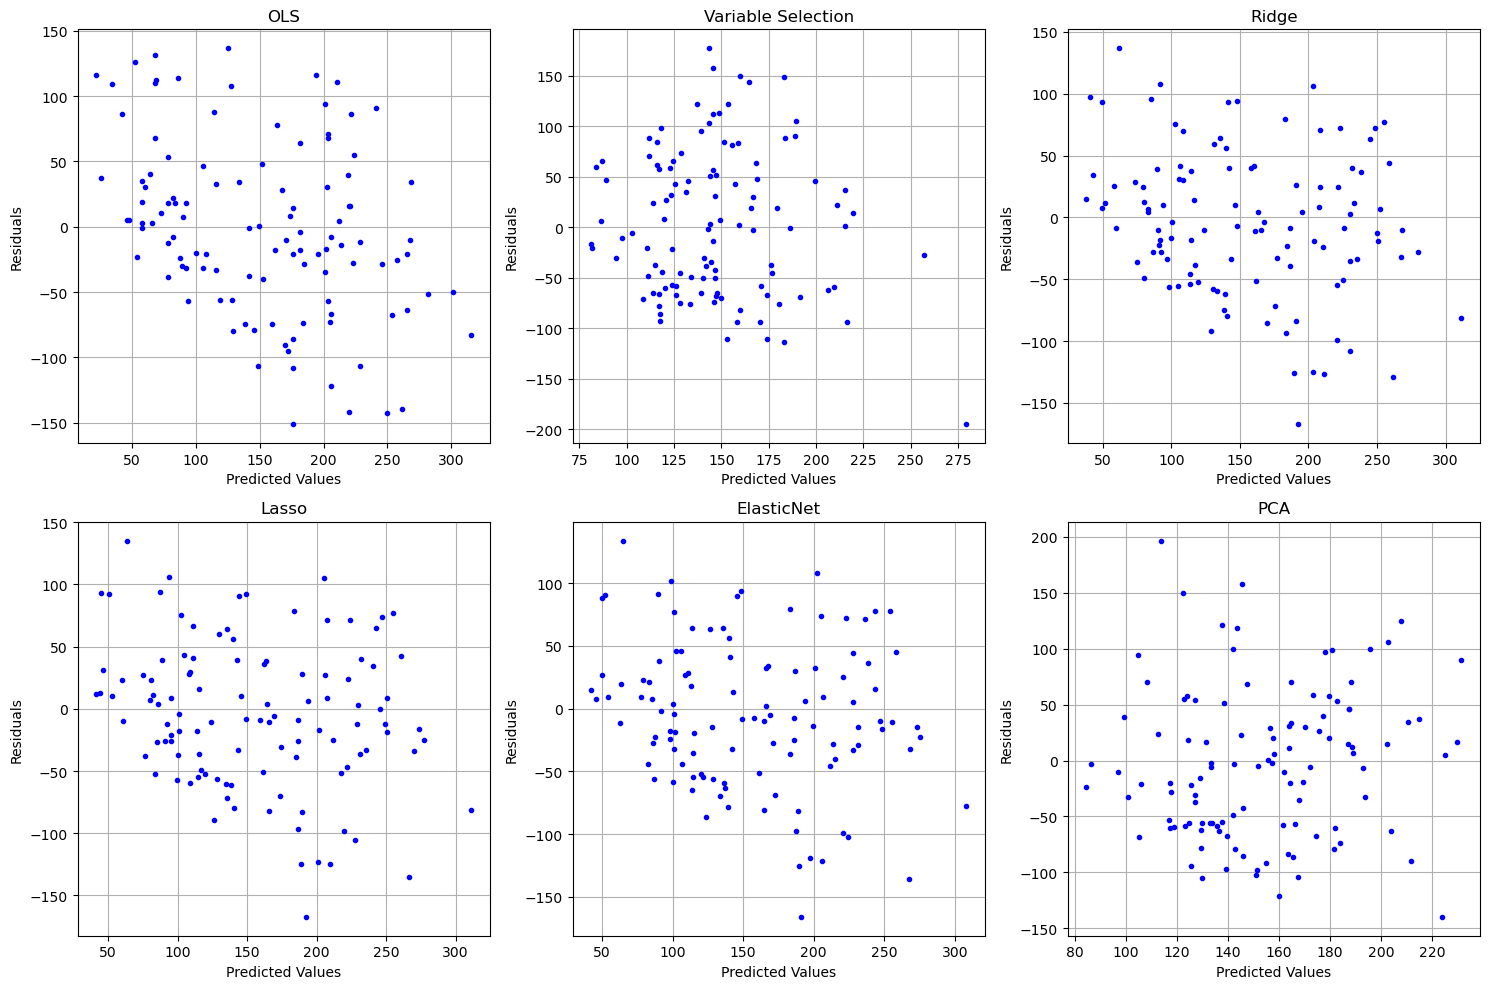

In [36]:
plt.figure(figsize=(15, 10))

# Subplot 1: OLS
OLS = LinearRegression()
OLS.fit(X_train, y_train)
y_pred = OLS.predict(X_test)
residuals = y_test - y_pred
plt.subplot(2, 3, 1)
plt.plot(y_pred, residuals, 'b.')
plt.title('OLS')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)

# Subplot 2: Variable Selection
VSelect = LinearRegression()
VSelect.fit(X_train[:, selected_features], y_train)
y_pred = VSelect.predict(X_test[:, selected_features])
residuals = y_test - y_pred
plt.subplot(2, 3, 2)
plt.plot(y_pred, residuals, 'b.')
plt.title('Variable Selection')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)

# Subplot 3: Ridge
Ridge_ = Ridge(alpha=0.1)
Ridge_.fit(X_train, y_train)
y_pred = Ridge_.predict(X_test)
residuals = y_test - y_pred
plt.subplot(2, 3, 3)
plt.plot(y_pred, residuals, 'b.')
plt.title('Ridge')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)

# Subplot 4: Lasso
Lasso_ = Lasso(alpha=0.1)
Lasso_.fit(X_train, y_train)
y_pred = Lasso_.predict(X_test)
residuals = y_test - y_pred
plt.subplot(2, 3, 4)
plt.plot(y_pred, residuals, 'b.')
plt.title('Lasso')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)

# Subplot 5: ElasticNet
ElasticN = ElasticNet(alpha=0.1, l1_ratio=0.5)
ElasticN.fit(X_train, y_train)
y_pred = ElasticN.predict(X_test)
residuals = y_test - y_pred
plt.subplot(2, 3, 5)
plt.plot(y_pred, residuals, 'b.')
plt.title('ElasticNet')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)

# Subplot 6: PCA
PCR = LinearRegression()
PCR.fit(X_train_pca, y_train)
y_pred = PCR.predict(X_test_pca)
residuals = y_test - y_pred
plt.subplot(2, 3, 6)
plt.plot(y_pred, residuals, 'b.')
plt.title('PCA')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()


1. **OLS (Ordinary Least Squares)**:
   - The residuals for OLS are quite spread out across the range of predicted values.
   - There are some large residuals, particularly for higher predicted values, which suggests the model may not be capturing all the underlying patterns in the data.

2. **Variable Selection**:
   - The variable selection model shows a wide spread of residuals, including some large outliers. 

3. **Ridge**:
   - The Ridge regression residuals appear more contained compared to OLS, with fewer extreme values. 

4. **Lasso**:
   - The Lasso plot also shows a concentration of residuals around zero but with a noticeable spread. Like Ridge, Lasso penalizes the coefficients, potentially leading to a more robust model with fewer large residuals.

5. **ElasticNet**:
   - ElasticNet combines L1 and L2 regularization and its residuals are similar to those of Ridge and Lasso. The spread of residuals is somewhat uniform, suggesting a balanced treatment of errors across the range of predictions.

6. **PCA (Principal Component Analysis)**:
   - PCA-based regression shows a distinct pattern with clusters of residuals, especially around certain ranges of predicted values. This might indicate that while PCA reduces dimensionality, it may also be omitting relevant information that affects the model's predictions.